# Effekt der JPEG-Bildkompression bewertet mit Maximum Likelihood Difference Scaling (MLDS) 
## Guillermo Aguilar
### Seminar: Visuelle Wahrnehmung beim Menschen und Bildqualität - WiSe 2020/21
*Dies ist nur eine **minimale** Beispieldokumentation, sie soll Ihnen eine Vorstellung davon geben, wie Sie Ihre Dokumentation strukturieren können. Wenn Sie mehr Bedingungen oder Bildmanipulationen, mehr Stimuli und mehr Ergebnisse zu zeigen haben, sollten Sie sie natürlich entsprechend erweitern. Behalten Sie aber die gleiche Gesamtstruktur bei.*

In [2]:
from PIL import Image # Pillow image library
import numpy as np
import matplotlib.pyplot as plt


# I use the module *pandas* to read csv files, and the 
# module *seaborn* for nice plotting defaults. 
# You don't have to necessarily use these modules but 
# I recommend you anyway to learn them if you don't know them yet.
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## 1. Fragestellung

Die Komprimierung von Bilder kann sich spürbar auf die Bildqualität auswirken, besonders wenn wir eine hohe Komprimierungsstufe anwenden. Unsere Forschungsfrage war, wie viel Kompression wir auf ein Bild anwenden können, ohne dass die Qualitätsverschlechterung für einen menschlichen Beobachter spürbar wird. Um unsere Forschungsfrage zu beantworten, haben wir die Wahrnehmungsskalen mittels Maximum Likelihood Difference Scaling (MLDS) für verschiedene Grade der JPEG-Kompression gemessen. Unser Ansatz war ähnlich als die Arbeit von Charrier et al. (2007). 

## 2. Experimentelles Design

Wir haben ein Bild genommen (*Einsteins* Porträt) und 7 Stufen der JPG-Kompression angewendet. Konkret haben wir das Einstein-Bild mit sieben verschiedenen *Qualitäts*-Parameterwerten (0, 5, 10, 20, 40, 60, 80) unter Verwendung der *PIL*-Bibliothek für Python gespeichert (der Qualitätsparameter reicht von 0 bis 100). Wir haben auch das ursprüngliche, unveränderte *Einstein*-Bild beigefügt. 

Zur besseren Veranschaulichung der Bildmanipulation haben wir die JPEG-Qualitätswerte in *Verzerrungswerte* umgerechnet, definiert als *Verzerrung = (100 - Qualität)*. Die folgende Abbildung zeigt den kompletten Satz der im Experiment verwendeten Stimuli.


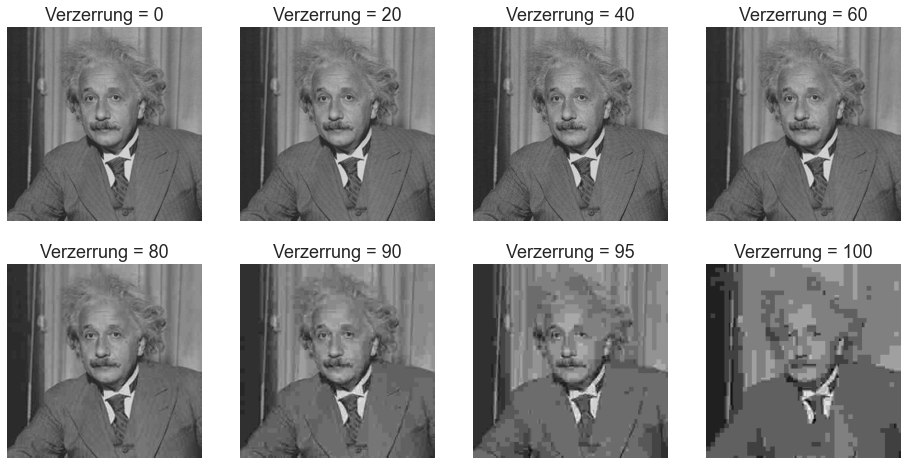

In [3]:
quality = [100, 80, 60, 40, 20, 10, 5, 0]
degradation = 100 - np.array(quality)

plt.figure(figsize=(16, 8))
for i, q in enumerate(quality):
    im = np.array(Image.open('stimuli/einstein_%d.jpg' % q).convert('L'))
    plt.subplot(2, 4, i+1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Verzerrung = %d' % (100-q))
    

Wir habe Wahrnehmungsskalen mittels MLDS mit der Methode der Triaden gemessen. Insgesamt gab es ${8 \choose 3}= 56$ mögliche Triadenkombinationen, die wir $n=5$ mal wiederholten, was insgesamt 280 Versuche pro Beobachter ergab.

## 3. Ergebnisse

Die folgende Abbildung zeigt die Wahrnehmungsskala, gemessen an zwei Beobachtern (dem Autor und einem naiven Teilnehmer). Wir haben das Maximum der Skala in Anlehnung an Charrier et al. (2007) auf eins normiert. 

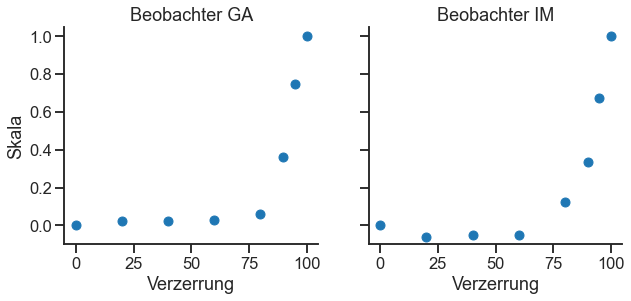

In [4]:
# (I analyzed the data in R using the MLDS package, and save the scale as a csv.
# then here I use pandas to read the csv file. You can use pandas but you don't *have* to. 
# I use it because I'm used to it.)

# reading scales and normalizing
df = pd.read_csv('ga_scale.csv')
scale_ga = df['x']/df['x'].max()

df = pd.read_csv('im_scale.csv')
scale_im = df['x']/df['x'].max()

#print(scale_ga)

# plotting
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(degradation, scale_ga, 'o', label='GA')
plt.ylabel('Skala')
plt.xlabel('Verzerrung')
plt.ylim(-0.1, 1.05)
plt.title('Beobachter GA')
sns.despine()

ax = plt.subplot(1,2,2)
plt.plot(degradation, scale_im, 'o', label='IM')
plt.xlabel('Verzerrung')
plt.ylim(-0.1, 1.05)
ax.set_yticklabels([])
plt.title('Beobachter IM')
sns.despine()


## 4. Interpretation, mögliche Probleme, offene Fragen

Wir stellen fest, dass die Wahrnehmungsskalen für beide Beobachter flach (oder leicht negativ) sind bis zu einem Verzerrung von 60 - 80 (Qualität von 20 - 40). Die Flachheit der Skala in diesem Bereich deutet darauf hin, dass die wahrgenommene Verschlechterung der Bildqualität nicht spürbar ist. Bei Degradationswerten höher als 60 - 80 (Qualität niedriger als 20 - 40) steigen die Wahrnehmungsskalen monoton an, was darauf hinweist, dass die Bildqualität abnimmt und dies von den Beobachtern wahrgenommen wird. Diese Ergebnisse stimmen mit unserem informellen subjektiven Eindruck von Qualitätsverschlechterung überein, wenn man die erste Abbildung oben betrachtet.


Eine klare Einschränkung in unserer Arbeit ist die Tatsache, dass wir eine begrenzte Anzahl von Stimuli verwendet haben. Wir haben nur ein Bild verwendet, ein Porträtbild von *A. Einstein*, und wir haben die Wahrnehmungsskalen für nur zwei Beobachter gemessen. Eine offene Frage ist, wie sich diese Ergebnisse auf andere Arten von Bildern (z. B. Landschaften, Kunstwerke) verallgemeinern lassen und ob es mehr Variabilität zwischen den Beobachtern gibt, die mit einer kleinen Anzahl von Teilnehmern nicht erfasst werden kann.

### Referenzen
Charrier et al. (2007). Maximum likelihood difference scaling of image quality in compression-degraded images. JOSA 24 (11): 3418-26
